# Outline:
1. Load in data and libraries
2. Exploratory Analysis
3. Preprocessing
4. Topic modeling and analysis

---

# 1. Load in data and libraries

In [75]:
# BASE ---------------------------------
import pandas as pd
import numpy as np
from datetime import datetime

# TEXT PROCESSING ----------------------
from nltk import sent_tokenize

# VISUALIZATION ------------------------
import matplotlib.pyplot as plt
import seaborn as sns

# STYLES -------------------------------
sns.set_style('darkgrid')

**Objective:** work with a challenging dataset consisting reviews from the Goodreads book review website, and a variety of attributes describing the items. Predict review rating which ranges from 0 to 5.

In [2]:
df = pd.read_csv(r'C:\Users\chris\OneDrive\Documents\Personal Projects\Goodreads\goodreads_train.csv')

# 2. Exploratory Analysis

---

Full df

In [3]:
df.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0


In [4]:
df.shape

(900000, 11)

In [5]:
print(df[df.duplicated()])

Empty DataFrame
Columns: [user_id, book_id, review_id, rating, review_text, date_added, date_updated, read_at, started_at, n_votes, n_comments]
Index: []


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 900000 entries, 0 to 899999
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       900000 non-null  object
 1   book_id       900000 non-null  int64 
 2   review_id     900000 non-null  object
 3   rating        900000 non-null  int64 
 4   review_text   900000 non-null  object
 5   date_added    900000 non-null  object
 6   date_updated  900000 non-null  object
 7   read_at       808234 non-null  object
 8   started_at    625703 non-null  object
 9   n_votes       900000 non-null  int64 
 10  n_comments    900000 non-null  int64 
dtypes: int64(4), object(7)
memory usage: 75.5+ MB


The read at and started at columns are the only column with nulls

In [7]:
df_num = df[['rating', 'n_votes', 'n_comments']]

In [8]:
df_num.describe()

,rating,n_votes,n_comments
count,900000.000000,900000.000000,900000.000000
mean,3.689639,3.294381,1.016656
std,1.252583,17.873553,5.963821
min,0.000000,-3.000000,-1.000000
25%,3.000000,0.000000,0.000000
50%,4.000000,0.000000,0.000000
75%,5.000000,2.000000,0.000000
max,5.000000,3222.000000,1335.000000


In [9]:
comments_less_than_zero = df[df['n_comments'] < 0]

In [10]:
comments_less_than_zero

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments
13007,feafbae6a2cf100c84a712edd03e930d,1828067,aef92262bb2cda22247768affe7582b9,2,"I haven't had much luck finding new, entertain...",Mon Aug 20 08:45:24 -0700 2012,Mon Aug 20 09:14:14 -0700 2012,Sat Aug 18 00:00:00 -0700 2012,Fri Aug 17 00:00:00 -0700 2012,7,-1
13045,feafbae6a2cf100c84a712edd03e930d,17645,29a5a6522bfc6496ec5a55efedcceef6,3,I finished rereading this and found it conside...,Thu Dec 04 15:29:13 -0800 2008,Sun Jul 26 19:29:33 -0700 2015,Wed Jul 04 00:00:00 -0700 2012,Wed Jul 04 00:00:00 -0700 2012,2,-1
157212,06e1a327fd336d7eee74aa62f1275386,12031532,c1a21535a8c1c180fc5296b47dbc9a78,3,Sometimes it hurts to give a book three stars....,Wed Nov 07 04:20:45 -0800 2012,Mon Nov 19 18:35:57 -0800 2012,Mon Nov 19 00:00:00 -0800 2012,Wed Nov 07 00:00:00 -0800 2012,4,-1
229164,b0ed09d14a462cb2d27327b87edf6f68,13049688,ea18fbf5e281ac1b2651afded38406d9,1,"Not feeling this one. I don't mind dark, but t...",Wed Mar 27 12:52:09 -0700 2013,Fri Nov 25 08:50:17 -0800 2016,NaN,Wed Mar 27 00:00:00 -0700 2013,1,-1
570065,3687fcc87a9c2d733df8cfc43ae8dcfe,26860475,9235c340d5beef19271ba880c9db559b,4,The review is for Life and Death only. \n 3.5/...,Tue Oct 06 16:01:41 -0700 2015,Sun Aug 20 10:41:24 -0700 2017,Fri Oct 09 00:00:00 -0700 2015,Tue Oct 06 00:00:00 -0700 2015,6,-1
622493,26b6d2e8d2c2e2f76a70a3359ba76c6a,17572903,bbcd01ffb27e53927825506ad3346ad5,4,My new historical fiction interest is WWI. \n ...,Wed Jul 31 16:46:13 -0700 2013,Tue Feb 11 20:31:08 -0800 2014,Wed Jul 31 00:00:00 -0700 2013,NaN,9,-1
796721,f2caf50868a530b15ecbb9b3273837e7,13163011,5c237482cc755b72364778bc85b59ce2,3,Enjoyed this more than the first in that the s...,Thu Aug 16 13:45:54 -0700 2012,Mon Aug 20 12:44:08 -0700 2012,Mon Aug 20 12:44:08 -0700 2012,Thu Aug 16 00:00:00 -0700 2012,1,-1
796728,f2caf50868a530b15ecbb9b3273837e7,4912857,aa057f840d2b35d8551c870299e71fc2,4,"Sometimes when I REALLY enjoy a book, I have t...",Thu Jun 28 10:55:02 -0700 2012,Thu Jul 26 09:06:06 -0700 2012,Wed Jul 11 00:00:00 -0700 2012,Thu Jun 28 00:00:00 -0700 2012,0,-1


In [11]:
# since there can't be a negative number of comments, and I can't find anywhere why this may be a value, I will replace 
# with zeros since there aren't that many and this is a large data set - I might just drop these later
df = df.replace(-1, 0)
df.describe()

,book_id,rating,n_votes,n_comments
count,9.000000e+05,900000.000000,900000.000000,900000.000000
mean,1.344145e+07,3.689639,3.294423,1.016664
std,9.357863e+06,1.252583,17.873544,5.963819
min,1.000000e+00,0.000000,-3.000000,0.000000
25%,6.340471e+06,3.000000,0.000000,0.000000
50%,1.344203e+07,4.000000,0.000000,0.000000
75%,2.057897e+07,5.000000,2.000000,0.000000
max,3.632868e+07,5.000000,3222.000000,1335.000000


In [12]:
print('# of comments: ', len(df.n_comments))
print('# of users: ', len(df.user_id.value_counts()))
print('# of books: ', len(df.book_id.value_counts()))


# of comments:  900000
# of users:  12188
# of books:  25474


In [13]:
months = {
        'Jan':1,
        'Feb':2,
        'Mar':3,
        'Apr':4,
        'May':5,
        'Jun':6,
        'Jul':7,
        'Aug':8,
        'Sep':9,
        'Oct':10,
        'Nov':11,
        'Dec':12
    }

# of comments:  900000
# of users:  12188
# of books:  25474


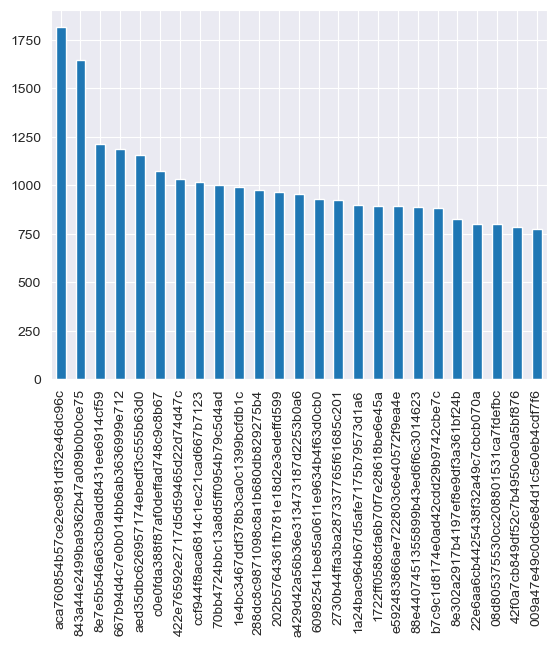

In [14]:
df1 = df.copy()

def summary_statistics(df1):
    print('# of comments: ', len(df1.n_comments))
    print('# of users: ', len(df1.user_id.value_counts()))
    print('# of books: ', len(df1.book_id.value_counts()))
    
    df2 = df1.copy()
    
    df2['year'] = df2['date_updated'].str[-4:]
    df2['month'] = df2['date_updated'].str[4:7]
    df2['day'] = df2['date_updated'].str[8:10]
    df2['month_n'] = df2['month'].apply(lambda x: months[x])
    
    cols = ['year', 'month_n', 'day']
    df2['date'] = df2[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")
    df2['date'] = pd.to_datetime(df2.loc[:, 'date']).copy()
    
    users = df2.user_id.value_counts()
    users.sort_values(ascending=0)[:25].plot(kind='bar')

#     values = df2.groupby(df2.date.dt.year)['review_id'].count()
#     date = df2['date'].dt.year
#     values.sort_index()
#     values.plot(kind='bar')
    
summary_statistics(df)

In [15]:
print('rating: ', df.rating.isnull().sum())
print('user_id: ', df.user_id.isnull().sum())
print('book_id: ', df.book_id.isnull().sum())
print('review_id: ', df.review_id.isnull().sum())
print('review_text: ', df.review_text.isnull().sum())
print('date_added: ', df.date_added.isnull().sum())
print('date_updated: ', df.date_updated.isnull().sum())
print('read_at: ', df.read_at.isnull().sum())
print('started_at: ', df.started_at.isnull().sum())
print('n_votes: ', df.n_votes.isnull().sum())
print('n_comments: ', df.n_comments.isnull().sum())

rating:  0
user_id:  0
book_id:  0
review_id:  0
review_text:  0
date_added:  0
date_updated:  0
read_at:  91766
started_at:  274297
n_votes:  0
n_comments:  0


<AxesSubplot:>

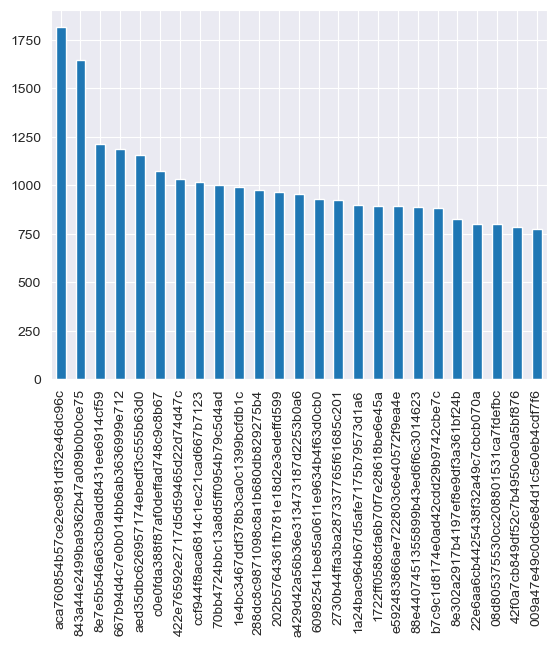

In [16]:
users = df.user_id.value_counts()
users.sort_values(ascending=0)[:25].plot(kind='bar')

In [17]:
print(users.nunique())
print(len(users))
print(users.mean())
users.describe()
print(type(users))

556
12188
73.84312438464063
<class 'pandas.core.series.Series'>


In [18]:
df['year'] = df['date_updated'].str[-4:]
df['month'] = df['date_updated'].str[4:7]
df['day'] = df['date_updated'].str[8:10]

In [19]:
df['day'] = df['date_updated'].str[8:10]

In [20]:
df['month_n'] = df['month'].apply(lambda x: months[x])

In [21]:
cols = ['year', 'month_n', 'day']
df['date'] = df[cols].apply(lambda x: '-'.join(x.values.astype(str)), axis="columns")

In [22]:
df['date'] = pd.to_datetime(df['date'])
df.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,year,month,day,month_n,date
0,8842281e1d1347389f2ab93d60773d4d,18245960,dfdbb7b0eb5a7e4c26d59a937e2e5feb,5,This is a special book. It started slow for ab...,Sun Jul 30 07:44:10 -0700 2017,Wed Aug 30 00:00:26 -0700 2017,Sat Aug 26 12:05:52 -0700 2017,Tue Aug 15 13:23:18 -0700 2017,28,1,2017,Aug,30,8,2017-08-30
1,8842281e1d1347389f2ab93d60773d4d,16981,a5d2c3628987712d0e05c4f90798eb67,3,Recommended by Don Katz. Avail for free in Dec...,Mon Dec 05 10:46:44 -0800 2016,Wed Mar 22 11:37:04 -0700 2017,NaN,NaN,1,0,2017,Mar,22,3,2017-03-22
2,8842281e1d1347389f2ab93d60773d4d,28684704,2ede853b14dc4583f96cf5d120af636f,3,"A fun, fast paced science fiction thriller. I ...",Tue Nov 15 11:29:22 -0800 2016,Mon Mar 20 23:40:27 -0700 2017,Sat Mar 18 23:22:42 -0700 2017,Fri Mar 17 23:45:40 -0700 2017,22,0,2017,Mar,20,3,2017-03-20


In [23]:
len(df.review_id)

900000

In [24]:
values = df.groupby(df.date.dt.year)['review_id'].count()

In [25]:
date = df['date'].dt.year

<AxesSubplot:xlabel='date'>

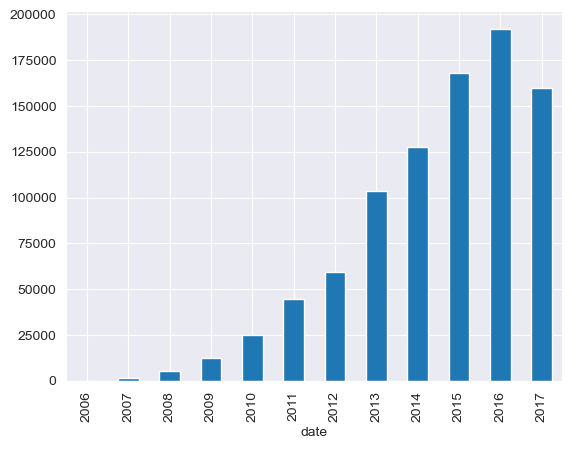

In [26]:
values.sort_index()
values.plot(kind='bar')

In [27]:
display(df.review_text)

0         This is a special book. It started slow for ab...
1         Recommended by Don Katz. Avail for free in Dec...
2         A fun, fast paced science fiction thriller. I ...
3         Recommended reading to understand what is goin...
4         I really enjoyed this book, and there is a lot...
                                ...                        
899995    3.5 stars. \n Jenna is a popular YA author and...
899996    This was a quick read for me. I have read a lo...
899997    ** spoiler alert ** \n 3.5 stars. \n This book...
899998    ** spoiler alert ** \n Another fun read from M...
899999    ** spoiler alert ** \n 3.5 stars \n I liked it...
Name: review_text, Length: 900000, dtype: object

**By rating**

In [50]:
zero_rating = df[df['rating']==0]
one_rating = df[df['rating']==1]
two_rating = df[df['rating']==2]
three_rating = df[df['rating']==3]
four_rating = df[df['rating']==4]
five_rating = df[df['rating']==5]

In [52]:
print(len(zero_rating))
print(len(one_rating))
print(len(two_rating))
print(len(three_rating))
print(len(four_rating))
print(len(five_rating))

30988
28718
72627
188972
313688
265007


<AxesSubplot:>

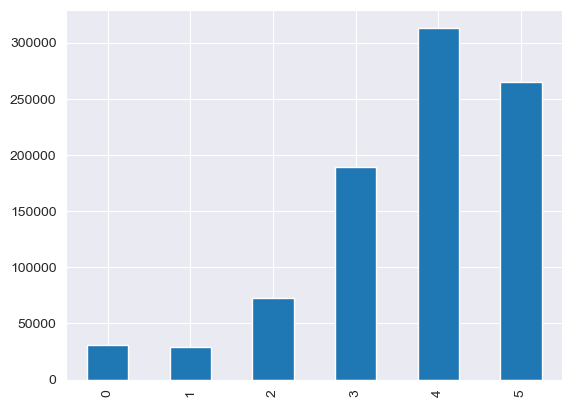

In [53]:
ratings = df.rating.value_counts().sort_index()
ratings.plot(kind='bar')

In [54]:
# zero rating

In [55]:
zero_rating.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,year,month,day,month_n,date
3,8842281e1d1347389f2ab93d60773d4d,27161156,ced5675e55cd9d38a524743f5c40996e,0,Recommended reading to understand what is goin...,Wed Nov 09 17:37:04 -0800 2016,Wed Nov 09 17:38:20 -0800 2016,NaN,NaN,5,1,2016,Nov,09,11,2016-11-09
7,8842281e1d1347389f2ab93d60773d4d,24189224,dbc01e2438df7a87ee3dc16ee23a53e5,0,Numerous people in publishing have told me thi...,Fri May 29 17:48:57 -0700 2015,Fri May 29 17:49:40 -0700 2015,NaN,NaN,11,5,2015,May,29,5,2015-05-29
13,8842281e1d1347389f2ab93d60773d4d,16158596,6ff8bbc4856aa403bbd8990407c9c77a,0,Recommended by David Risher,Mon Jul 07 10:56:15 -0700 2014,Mon Jul 07 10:56:39 -0700 2014,NaN,NaN,0,0,2014,Jul,07,7,2014-07-07


# of comments:  30988
# of users:  4903
# of books:  12637


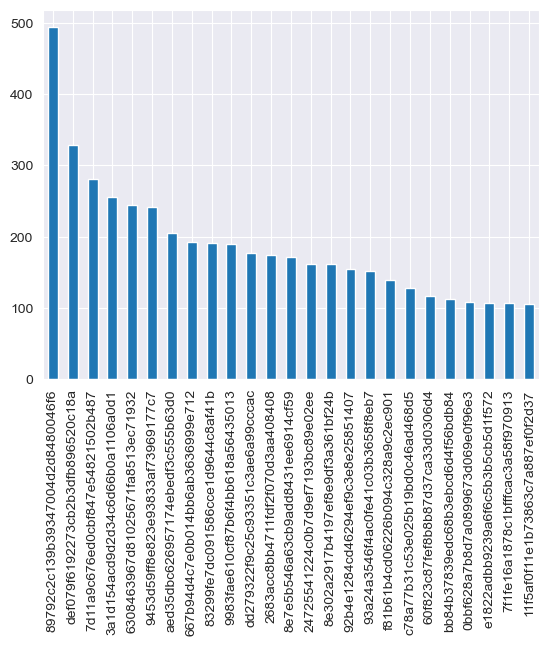

In [56]:
summary_statistics(zero_rating)

# of comments:  28718
# of users:  6511
# of books:  10465


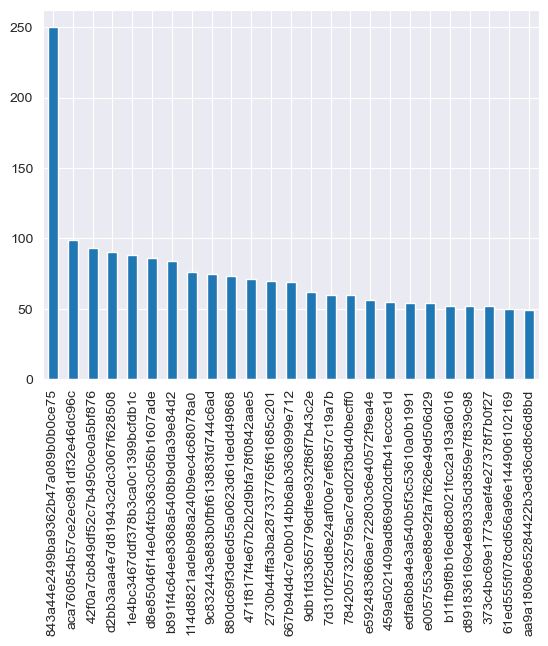

In [57]:
# one rating
summary_statistics(one_rating)

# of comments:  72627
# of users:  9156
# of books:  17696


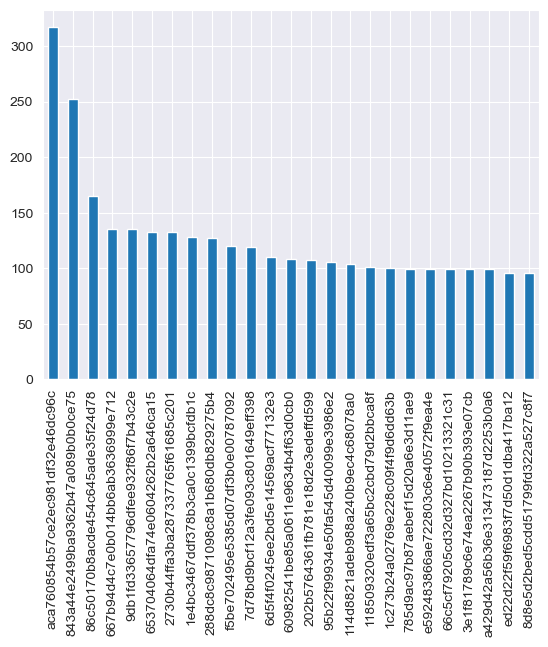

In [58]:
# two rating
summary_statistics(two_rating)

# of comments:  188972
# of users:  10849
# of books:  23638


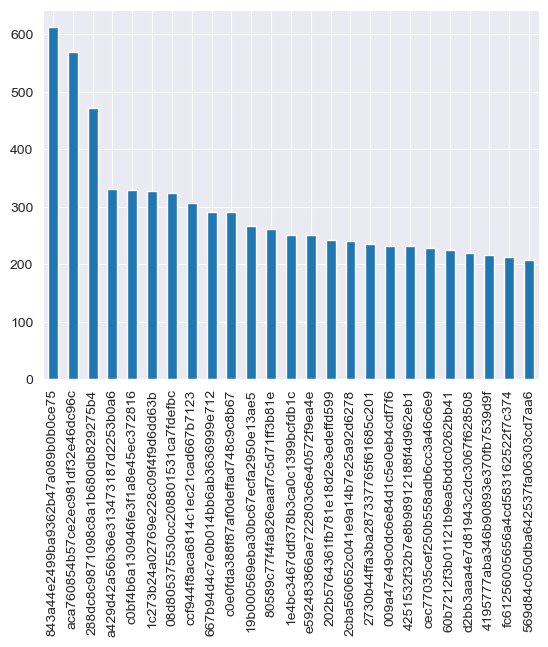

In [59]:
# three rating
summary_statistics(three_rating)

# of comments:  313688
# of users:  11348
# of books:  24959


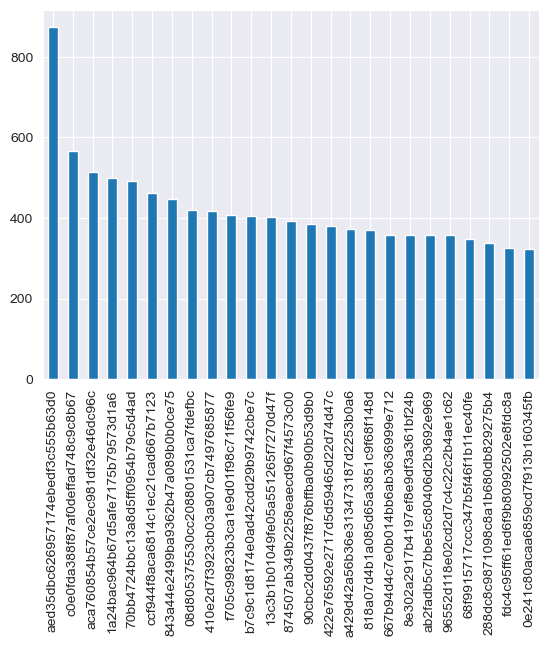

In [60]:
# four rating
summary_statistics(four_rating)

# of comments:  265007
# of users:  11416
# of books:  23068


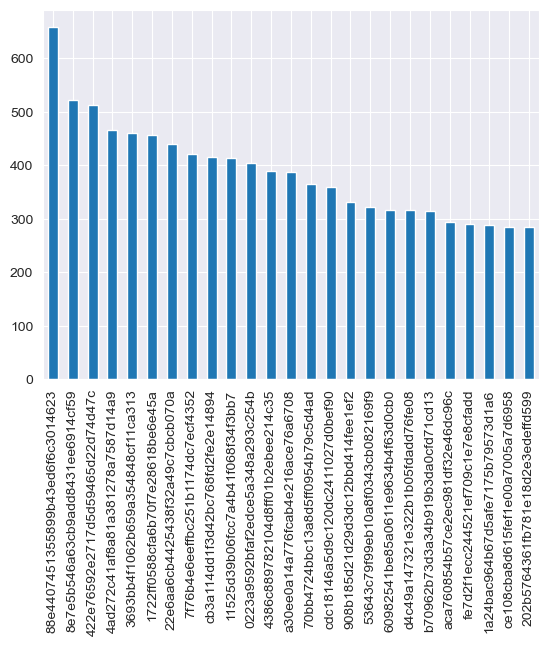

In [61]:
# five rating
summary_statistics(five_rating)

**By book**

In [28]:
print('# of books total: ', len(df.book_id.value_counts()))

# of books total:  25474


<AxesSubplot:>

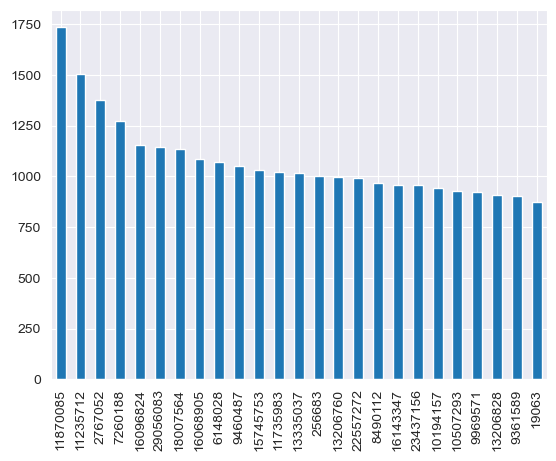

In [29]:
books = df.book_id.value_counts()
books.sort_values(ascending=0)[:25].plot(kind='bar')

In [39]:
books

11870085    1734
11235712    1505
2767052     1378
7260188     1273
16096824    1153
            ... 
14686464       2
23582513       1
12375954       1
16123293       1
12997592       1
Name: book_id, Length: 25474, dtype: int64

<AxesSubplot:>

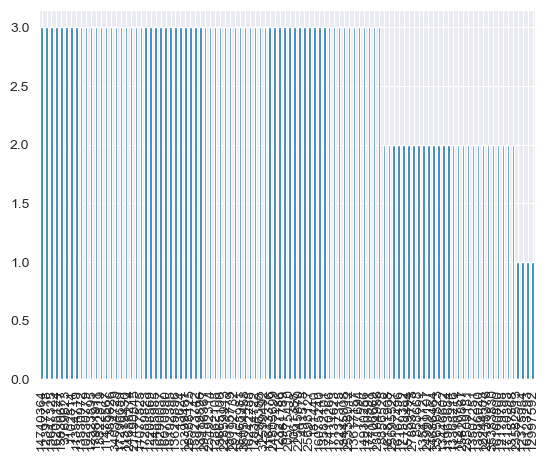

In [41]:
books.sort_values(ascending=0)[-100:].plot(kind='bar')

In [33]:
least = books.sort_values(ascending=0)[-200:]
least.describe()

count    200.000000
mean       3.305000
std        0.777817
min        1.000000
25%        3.000000
50%        3.000000
75%        4.000000
max        4.000000
Name: book_id, dtype: float64

In [42]:
highest_book = df.book_id.mode()[0]
highest_book_reviews = df[df['book_id']==highest_book]

In [43]:
highest_book_reviews.describe()

,book_id,rating,n_votes,n_comments,month_n
count,1734.0,1734.000000,1734.000000,1734.000000,1734.000000
mean,11870085.0,4.232411,3.258939,1.247405,6.014418
std,0.0,1.116766,33.781969,9.047635,3.423775
min,11870085.0,0.000000,0.000000,0.000000,1.000000
25%,11870085.0,4.000000,0.000000,0.000000,3.000000
50%,11870085.0,5.000000,0.000000,0.000000,6.000000
75%,11870085.0,5.000000,1.000000,0.000000,9.000000
max,11870085.0,5.000000,1224.000000,263.000000,12.000000


In [44]:
highest_book2 = df[df['book_id']==11235712]
highest_book2.describe()

,book_id,rating,n_votes,n_comments,month_n
count,1505.0,1505.00000,1505.000000,1505.000000,1505.000000
mean,11235712.0,3.98804,2.473090,0.671096,6.047841
std,0.0,1.06622,7.776087,2.429346,3.511811
min,11235712.0,0.00000,0.000000,0.000000,1.000000
25%,11235712.0,4.00000,0.000000,0.000000,3.000000
50%,11235712.0,4.00000,0.000000,0.000000,6.000000
75%,11235712.0,5.00000,2.000000,0.000000,9.000000
max,11235712.0,5.00000,160.000000,39.000000,12.000000


In [45]:
highest_book3 = df[df['book_id']==2767052]
highest_book3.describe()

,book_id,rating,n_votes,n_comments,month_n
count,1378.0,1378.000000,1378.000000,1378.000000,1378.000000
mean,2767052.0,4.311321,2.625544,1.287373,6.230769
std,0.0,0.955602,19.117509,8.097544,3.521551
min,2767052.0,0.000000,0.000000,0.000000,1.000000
25%,2767052.0,4.000000,0.000000,0.000000,3.000000
50%,2767052.0,5.000000,0.000000,0.000000,6.000000
75%,2767052.0,5.000000,1.000000,0.000000,9.000000
max,2767052.0,5.000000,585.000000,160.000000,12.000000


**By user**
- User with most reviews

In [46]:
highest_user = df.user_id.mode()[0]
print(highest_user)

aca760854b57ce2ec981df32e46dc96c


In [47]:
highest_user_reviews = df[df['user_id']==highest_user]
highest_user_reviews.head(3)

,user_id,book_id,review_id,rating,review_text,date_added,date_updated,read_at,started_at,n_votes,n_comments,year,month,day,month_n,date
104486,aca760854b57ce2ec981df32e46dc96c,6390076,2f0998b2c3446b2875c723a8fc675174,3,I was lucky and enjoyed this as an audio almos...,Fri Oct 13 23:08:19 -0700 2017,Sun Oct 15 19:41:56 -0700 2017,NaN,NaN,6,0,2017,Oct,15,10,2017-10-15
104487,aca760854b57ce2ec981df32e46dc96c,6324651,1ab98a9df44de48c316f22de5d830fd8,5,"""Every big hotel has got a ghost. Why? Hell, p...",Wed Sep 20 08:56:20 -0700 2017,Tue Oct 03 13:54:35 -0700 2017,Tue Oct 03 16:50:26 -0700 2017,Wed Sep 20 08:56:20 -0700 2017,12,0,2017,Oct,03,10,2017-10-03
104488,aca760854b57ce2ec981df32e46dc96c,23129410,a2f6f3fbcf54a378f93408b03375f335,3,"""The search for truth takes us to dangerous pl...",Tue Sep 12 19:14:18 -0700 2017,Tue Sep 26 18:28:43 -0700 2017,Tue Sep 19 00:00:00 -0700 2017,Tue Sep 12 00:00:00 -0700 2017,4,0,2017,Sep,26,9,2017-09-26


In [48]:
print("Average rating: ", highest_user_reviews.rating.mean())
print("# of books: ", len(highest_user_reviews.book_id.value_counts()))

Average rating:  3.286501377410468
# of books:  1815


In [51]:
# one user had the most ratings of 3 and 1
highest_user = three_rating.user_id.mode()[0]
highest_user_reviews = df[df['user_id']==highest_user]
print('# of books: ', len(highest_user_reviews.book_id.value_counts()))
highest_user_reviews.describe()

# of books:  1647


,book_id,rating,n_votes,n_comments,month_n
count,1.647000e+03,1647.00000,1647.000000,1647.000000,1647.000000
mean,1.242063e+07,2.91864,0.930783,0.912568,6.884032
std,8.038857e+06,1.11029,1.649056,2.303968,3.214568
min,2.080000e+02,1.00000,0.000000,0.000000,1.000000
25%,6.782466e+06,2.00000,0.000000,0.000000,4.000000
50%,1.067728e+07,3.00000,0.000000,0.000000,7.000000
75%,1.772795e+07,4.00000,1.000000,0.000000,10.000000
max,3.549394e+07,5.00000,28.000000,27.000000,12.000000


In [66]:
# one user had the most ratings of 0
highest_user = zero_rating.user_id.mode()[0]
highest_user_reviews = df[df['user_id']==highest_user]
print('# of books: ', len(highest_user_reviews.book_id.value_counts()))
highest_user_reviews.describe()

# of books:  584


,book_id,rating,n_votes,n_comments,month_n
count,5.840000e+02,584.000000,584.000000,584.000000,584.000000
mean,1.278811e+07,0.770548,1.513699,0.424658,6.549658
std,7.430433e+06,1.806816,3.944271,1.649723,3.451343
min,3.867000e+03,0.000000,0.000000,0.000000,1.000000
25%,7.651752e+06,0.000000,0.000000,0.000000,4.000000
50%,1.211683e+07,0.000000,0.000000,0.000000,6.000000
75%,1.816680e+07,0.000000,1.000000,0.000000,10.000000
max,3.031284e+07,5.000000,44.000000,20.000000,12.000000


In [64]:
# one user had the most ratings 2
highest_user = two_rating.user_id.mode()[0]
highest_user_reviews = df[df['user_id']==highest_user]
print('# of books: ', len(highest_user_reviews.book_id.value_counts()))
highest_user_reviews.describe()

# of books:  1815


,book_id,rating,n_votes,n_comments,month_n
count,1.815000e+03,1815.000000,1815.000000,1815.000000,1815.000000
mean,1.199715e+07,3.286501,1.932231,0.781267,6.592287
std,8.346945e+06,1.161923,2.620909,1.783818,3.448974
min,2.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,5.854430e+06,3.000000,0.000000,0.000000,3.000000
50%,1.286644e+07,3.000000,1.000000,0.000000,7.000000
75%,1.791619e+07,4.000000,3.000000,1.000000,10.000000
max,3.518621e+07,5.000000,22.000000,18.000000,12.000000


In [65]:
# one user had the most ratings of 4
highest_user = four_rating.user_id.mode()[0]
highest_user_reviews = df[df['user_id']==highest_user]
print('# of books: ', len(highest_user_reviews.book_id.value_counts()))
highest_user_reviews.describe()

# of books:  1157


,book_id,rating,n_votes,n_comments,month_n
count,1.157000e+03,1157.000000,1157.000000,1157.000000,1157.000000
mean,1.261603e+07,3.359551,0.115817,0.008643,6.505618
std,9.486018e+06,1.579614,0.386270,0.117329,3.044255
min,1.000000e+00,0.000000,0.000000,0.000000,1.000000
25%,2.146957e+06,4.000000,0.000000,0.000000,4.000000
50%,1.313864e+07,4.000000,0.000000,0.000000,6.000000
75%,1.888929e+07,4.000000,0.000000,0.000000,9.000000
max,3.524777e+07,5.000000,5.000000,3.000000,12.000000


In [62]:
# user with most 5 reviews
# one user had the most ratings of 3 and 1
highest_user = five_rating.user_id.mode()[0]
highest_user_reviews = df[df['user_id']==highest_user]
print('# of books: ', len(highest_user_reviews.book_id.value_counts()))
highest_user_reviews.describe()

# of books:  889


,book_id,rating,n_votes,n_comments,month_n
count,8.890000e+02,889.00000,889.000000,889.000000,889.000000
mean,2.465012e+07,4.68279,7.136108,0.553431,6.659168
std,4.455138e+06,0.65291,11.047325,1.590977,3.551064
min,1.438400e+04,0.00000,0.000000,0.000000,1.000000
25%,2.207210e+07,4.00000,2.000000,0.000000,4.000000
50%,2.488922e+07,5.00000,5.000000,0.000000,7.000000
75%,2.741607e+07,5.00000,10.000000,0.000000,10.000000
max,3.610751e+07,5.00000,199.000000,25.000000,12.000000


**Notes:** could do a sentiment analysis on the review_text for some of these, and some topic modeling maybe, I could also see if word count is related to score. I should also look into different books and see if there is a trend among their respective ratings. Also, could look at separate users and books and see if there are trends there.<br>
Maybe reviews of certain scores have things in common, or maybe the read date and the review date could have some patterns.I could look at patterns related to each score or across scores. Maybe a user frequently gives bad reviews, or a certain book frequently gets bad reviews.

# 3. Preprocessing

---

#### Cleaning:
1. Punctuation
2. Digits
3. Expand abbreviations
4. Sentence segmentation
2. Word tokenization
6. Stemming / lemmatization
7. Lowercase
8. Stop word removal

In [68]:
df = df.drop(columns=['year', 'month', 'day', 'month_n'])

In [73]:
display(df['review_text'])

0         This is a special book. It started slow for ab...
1         Recommended by Don Katz. Avail for free in Dec...
2         A fun, fast paced science fiction thriller. I ...
3         Recommended reading to understand what is goin...
4         I really enjoyed this book, and there is a lot...
                                ...                        
899995    3.5 stars. \n Jenna is a popular YA author and...
899996    This was a quick read for me. I have read a lo...
899997    ** spoiler alert ** \n 3.5 stars. \n This book...
899998    ** spoiler alert ** \n Another fun read from M...
899999    ** spoiler alert ** \n 3.5 stars \n I liked it...
Name: review_text, Length: 900000, dtype: object

From a quick look, there are some that mention their rating outright, also spoiler alerts.

In [74]:
df['review_text'].str.len().mean()

1064.3053933333333

In [80]:
display(df['review_text'][0])

'This is a special book. It started slow for about the first third, then in the middle third it started to get interesting, then the last third blew my mind. This is what I love about good science fiction - it pushes your thinking about where things can go. \n It is a 2015 Hugo winner, and translated from its original Chinese, which made it interesting in just a different way from most things I\'ve read. For instance the intermixing of Chinese revolutionary history - how they kept accusing people of being "reactionaries", etc. \n It is a book about science, and aliens. The science described in the book is impressive - its a book grounded in physics and pretty accurate as far as I could tell. (view spoiler)[Though when it got to folding protons into 8 dimensions I think he was just making stuff up - interesting to think about though. \n But what would happen if our SETI stations received a message - if we found someone was out there - and the person monitoring and answering the signal o